# Template for Euler-Lagrange exercises

[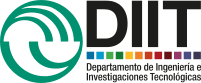](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2025 [Mariano Real](mailto:mreal@unlam.edu.ar) | [Víctor Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

This notebook is a template.
Thought to be used every time you start a new exercise:
1. "Save a new copy" in the File menu
2. "Rename", also in that menu, to write: "name of exercise - Last Name"


## Loading the necessary Python modules

In [1]:
import sympy as sym # import functions for symbolic manipulations
from sympy.physics import mechanics as mech # from sympy we use functions for mechanics
mech.init_vprinting() # dot notation for velocity and acceleration
import warnings
warnings.filterwarnings("ignore")

## System setup

System's Physical parameters are define, the ones that do not vary with time.

In [2]:
m1, m2, g, l1, l2 = sym.symbols('m1, m2, g, \ell_1, \ell_2', positive=True) # Parameters for the system
t = sym.Symbol('t') # Declared on its own so we don't impose it to be positive

And the generalized coordinates.

In [3]:
e = mech.ReferenceFrame('e') # Cartesian frame of reference
phi1, phi2 = mech.dynamicsymbols(r'\varphi_1, \varphi_2') # variables that will change with time, dynamic variables
# the r is needed for this to be considered as string

Then the positions for each particle are described using these coordinates.

In [4]:
m1_r = l1*( sym.cos(phi1)* e.x + sym.sin(phi1)* e.y )
m2_r = m1_r + l2*( sym.cos(phi2)* e.x + sym.sin(phi2)* e.y )
m1_r, m2_r

## Translational kinetic energy

In [7]:
def energyKineticTranslation(mass, position, frameOfReference):
    """
    Given a mass and the position of a point particle in a frame of reference, it returns its kinetic energy.
    
    Parameters
    ----------
    mass: (sympy.core.symbol.Symbol)
        of one particle
    position: (sympy.physics.vector.vector.Vector)
        of the particle's center of mass
    frameOfReference: (sympy.physics.vector.frame.ReferenceFrame)
        in which the position is expressed
    
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
        Kinetic Energy, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocity = position.dt(frameOfReference)
    oneHalf = sym.Rational(1,2) # Rational: a quotient of integers
    T_translational = sym.Eq(
        sym.Symbol('T_\mathrm{translational}'),
        oneHalf* mass* velocity.dot(velocity)
        ).simplify()
    return T_translational

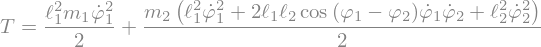

In [8]:
# System's kinetic energy
m1_T = energyKineticTranslation(m1, m1_r, e)
m2_T = energyKineticTranslation(m2, m2_r, e)
T = sym.Eq(sym.Symbol('T'), m1_T.rhs + m2_T.rhs ).simplify()
# sym.Eq(LHS, RHS)
T

## Gravitational potential energy

In [11]:
def energyPotentialGravitational(mass, position, accelerationGravity):
    """
    Provides the gravitational potential energy of a particle of mass m and position r in a given frame of reference in which g is the acceleration due to gravity.
    
    Parameters
    ----------
    accelerationGravity: (sympy.physics.vector.vector.Vector)
        vector oriented according to the frame of reference
    mass: (sympy.core.symbol.Symbol
        of the body
    position: (sympy.core.symbol.Symbol)
        of the center of mass in a frame of reference related to the one for the acceleration due to gravity

    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        The potential energy of the system is made explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        V = - (m \vec{accelerationGravity}) \cdot{position}
    """
    V_gravitational = sym.Eq(
        sym.Symbol('V_\mathrm{gravitational}'),
        - (mass* accelerationGravity).dot(position)
        ).simplify()
    return V_gravitational

In [13]:
# Potential energy
g_vector = g* (-e.y) # acceleration due to gravity on the -y versor
m1_V = energyPotentialGravitational(m1, m1_r, g_vector)
m2_V = energyPotentialGravitational(m2, m2_r, g_vector)
V = sym.Eq(sym.Symbol('V'), m1_V.rhs + m2_V.rhs ).simplify()
V

## Euler-Lagrange equations

As we've done before with the energies, we can save time and effort and write in a single function the whole procedure for obtaining the Euler-Lagrange equations.

In [9]:
def eulerLagrange(T, V, coordinateGeneralized):
    '''    
    Provides the Euler-Lagrange equation for one generalized coordinate starting from the energies.
    
    Parameters
    ----------
    T : Sympy Equality (sympy.core.relational.Equality)
        The kinetic energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        The potential energy of the system is explicit on the right-hand side, as a function of the generalized coordinates and velocities, and time.
    coordinateGeneralized: Sympy Symbol (sympy.core.symbol.Symbol)
        for which we are looking the Euler-Lagrange equation
        
    Returns
    -------
    Sympy Equality (sympy.core.relational.Equality)
        Homogeneous Euler-Lagrange equation
    '''
    lagrangian = (T.rhs - V.rhs).expand()
    t = sym.Symbol('t') # since we have to differentiate respect to time, the function diff declares t as a symbol
    return sym.Eq(
        lagrangian.diff(coordinateGeneralized) 
        - lagrangian.diff(coordinateGeneralized.diff(t)).diff(t)
        , 0
    ).simplify()

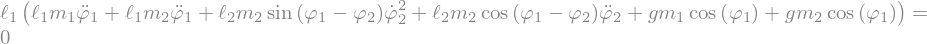

In [10]:
phi1_EL = eulerLagrange(T, V, phi1)
phi1_EL

In [11]:
phi2_EL = eulerLagrange(T, V, phi2)
phi2_EL